# Notebook del proyecto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Swarm_Behaviour.csv")

## Exploración de datos

In [3]:
data.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [4]:
seed = 1231
label_name = "Swarm_Behaviour"
attribs = ["", "Vel", "A", "S", "C", "nAC", "nS"]

In [5]:
describe = data.describe()
describe

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
count,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,...,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000
mean,104.413631,-73.481853,-0.697607,0.061480,-0.147964,0.152034,-1.055732,-0.731546,-0.034915,0.077123,...,0.086824,-0.126276,0.127497,-1.526260,-0.118891,-0.012388,0.085076,26.433995,2.130679,0.341242
std,843.200079,573.329374,6.427840,7.366739,0.376078,0.588582,26.388570,20.684183,0.559690,0.628478,...,7.683539,0.378830,0.570589,73.903764,7.002853,0.555143,0.614603,34.136098,7.431911,0.474136
min,-1414.140000,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.000000,0.000000
25%,-542.020000,-611.220000,-5.360000,-5.680000,-0.230000,-0.010000,0.000000,0.000000,-0.040000,-0.020000,...,-5.600000,-0.190000,0.000000,0.000000,0.000000,-0.070000,0.000000,2.000000,0.000000,0.000000
50%,145.300000,-157.350000,-0.450000,-1.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
75%,896.200000,425.700000,3.940000,7.260000,0.000000,0.940000,0.000000,0.000000,0.000000,0.020000,...,7.480000,0.000000,0.540000,0.000000,0.000000,0.000000,0.030000,35.000000,1.000000,1.000000
max,1406.080000,1015.800000,18.470000,18.570000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,...,18.490000,1.000000,1.040000,255.990000,57.840000,2.680000,2.680000,142.000000,64.000000,1.000000


In [6]:
def attrib_names(attrib="", coords=["x","y"], coord=None):
    c = coords if coord == None else [coord]
    return [f"{coord}{attrib}{num}" for num in range(1, 201) for coord in c]

# Example:
# >>> attrib_names("Vel")
# ['xVel1',
# 'yVel1',
# 'xVel2',
# 'yVel2',
# 'xVel3',
# 'yVel3'
# ...

In [7]:
def psi(population, N=200):
    speeds = list()
    total_velocity = np.array([0,0], dtype="float64")
    for i in range(1, N+1):
        vi = population[[f"xVel{i}", f"yVel{i}"]]
        total_velocity += vi.to_numpy()
        speed = np.linalg.norm(vi)
        speeds.append(speed)
    v0 = np.mean(speeds)
    psi = np.linalg.norm(total_velocity) / (v0 * N)
    return psi

In [8]:
def plot_population(row):
    X = row[attrib_names("", coord="x")]
    Y = row[attrib_names("", coord="y")]
    X_vel = row[attrib_names("Vel", coord="x")]
    Y_vel = row[attrib_names("Vel", coord="y")]
    X_a = row[attrib_names("A", coord="x")]
    Y_a = row[attrib_names("A", coord="y")]
    plt.scatter(X, Y, marker=".", c="r")
    plt.quiver(X, Y, X_vel, Y_vel, color="blue", width=0.003)
    plt.quiver(X, Y, X_a, Y_a, color="green", width=0.003)
    plt.xticks([])
    plt.yticks([])

In [9]:
flock = data[data[label_name] == 0]
no_flock = data[data[label_name] == 0]

/opt/anaconda/lib/python3.8/site-packages/matplotlib/quiver.py:689: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/opt/anaconda/lib/python3.8/site-packages/matplotlib/quiver.py:689: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


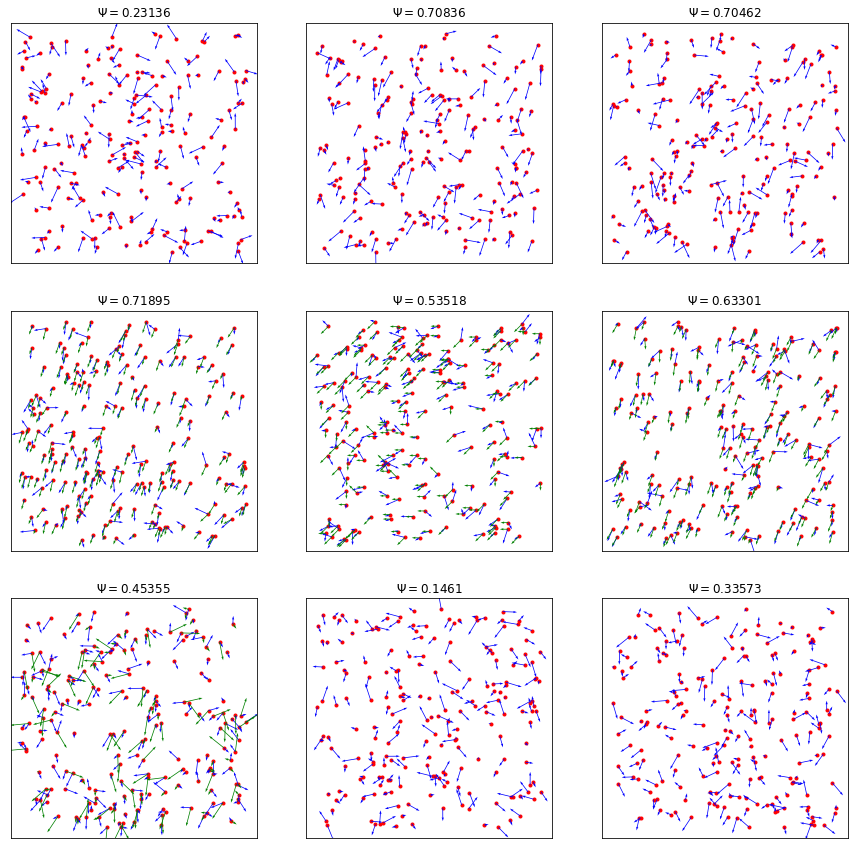

In [10]:
figures = 3
plt.figure(figsize=(15, figures*5))
num_samples = figures * 3
samples = flock.sample(num_samples)
for idx in range(num_samples):
    row = samples.iloc[idx]
    plt.subplot(figures, 3, idx+1)
    plot_population(row)
    plt.title(f"$\Psi = {round(psi(row), 5)}$")
plt.show()

## Preparación de los datos

In [11]:
def show_balance(target):
    classes = target.unique()
    classes_count = target.value_counts() * 100
    classes_percentage = round(classes_count / len(target), 2)
    for idx in range(len(classes)):
        c = classes[idx]
        c_percentage = classes_percentage[idx]
        print(f"Class {c}: {c_percentage}%")
    target.hist()
    plt.show()

Class 0.0: 65.88%
Class 1.0: 34.12%


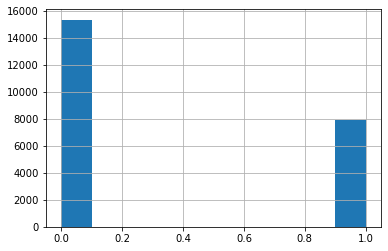

In [12]:
show_balance(data[label_name])

In [13]:
# Balanceo de datos
flock_aumented = flock.sample(len(no_flock), replace=True, random_state=seed)
balanced_data = pd.concat([no_flock, flock_aumented])

Class 0.0: 100.0%


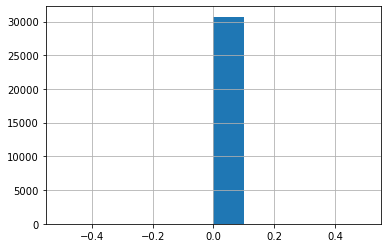

In [14]:
show_balance(balanced_data[label_name])

In [15]:
from sklearn.model_selection import train_test_split

def split_Xy(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    return X, y

In [16]:
var_data = balanced_data.iloc[:]
for attrib in attribs[:-2]:
    X = var_data[attrib_names(attrib, coord="x")]
    Y = var_data[attrib_names(attrib, coord="y")]
    var_data[f"x{attrib}"] = np.var(X, axis=1)
    var_data[f"y{attrib}"] = np.var(Y, axis=1)
for attrib in attribs[-2:]:
    X = var_data[attrib_names(attrib, coord="")]
    var_data[f"{attrib}"] = np.var(X, axis=1)

In [17]:
var_columns = [f"{coord}{attrib}" for attrib in attribs[:-2] for coord in ["x", "y"]]
var_columns = var_columns + attribs[-2:] + [label_name]
var_data[var_columns].groupby(label_name).mean()

,x,y,xVel,yVel,xA,yA,xS,yS,xC,yC,nAC,nS
Swarm_Behaviour,,,,,,,,,,,,
0.0,614561.136894,322509.057326,34.962718,36.607295,0.052962,0.04819,5.827032e+07,7.816622e+07,0.209366,0.205485,274.012983,12.594584


In [18]:
var_data[var_columns]

,x,y,xVel,yVel,xA,yA,xS,yS,xC,yC,nAC,nS,Swarm_Behaviour
0,632024.879769,337585.552075,32.695512,44.985979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.839975,0.274775,0.0
1,681143.767784,362351.266749,61.362078,61.928433,0.000000,0.000000,0.065987,0.192477,0.000000,0.000000,410.915600,0.038400,0.0
2,539180.511861,344240.361749,40.364942,41.198266,0.000000,0.000000,0.013559,0.012977,0.041325,0.043997,18.234400,0.056400,0.0
3,564760.009835,330187.144685,4.254120,2.844566,0.011977,0.000149,0.554744,0.881922,0.000000,0.000000,21.652400,0.103975,0.0
4,660247.588752,348375.869714,71.656605,70.052925,0.139375,0.407500,94873.581421,6409.363765,0.000000,0.000000,39.744375,0.401100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,605622.817615,319480.820867,44.549146,51.775331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.910000,0.261600,0.0
17580,609705.025820,331372.342042,22.151170,24.118912,0.002226,0.035489,85.006638,199.803944,0.016429,0.025287,573.754400,0.529900,0.0
2559,540688.665313,347408.515542,33.243103,34.872838,0.000000,0.000000,0.050167,0.049661,0.000000,0.000000,3.500000,0.131775,0.0
16860,582748.106852,288050.376039,25.719069,23.432733,0.017754,0.021154,0.628810,0.336198,0.013478,0.018857,2.280975,0.157600,0.0


In [19]:
train_set, test_set = train_test_split(var_data[var_columns], test_size=0.25, random_state=seed)
X_train, y_train = split_Xy(train_set, label_name)
X_test, y_test = split_Xy(test_set, label_name)

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)

y_train_one_hot = OneHotEncoder(sparse=False).fit_transform(y_train.to_numpy().reshape((-1,1)))

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report, accuracy_score
    
def show_reports(y_real, y_pred):
    labels = ["Disperse", "Groupped"]
    print(classification_report(y_real, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_real, y_pred, normalize="true")
    RocCurveDisplay.from_predictions(y_real, y_pred)

In [22]:
def predict_model(model, X):
    y_pred_score = model.predict(X)
    y_pred = np.argmax(np.round(y_pred_score), axis=1)
    return y_pred

## Modelos

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow import keras

2022-01-31 15:13:17.144932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-31 15:13:17.144960: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7678

    accuracy                           1.00      7678
   macro avg       1.00      1.00      1.00      7678
weighted avg       1.00      1.00      1.00      7678



/opt/anaconda/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


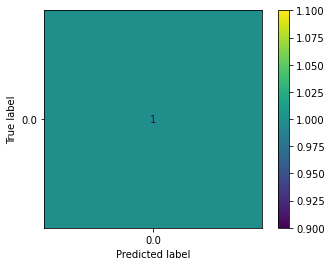

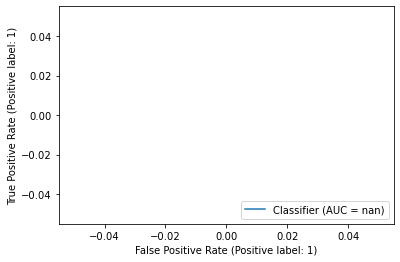

In [27]:
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train, y_train)
show_reports(y_test, rf.predict(X_test))

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_mm, y_train)
show_reports(y_test, lr.predict(mm_scaler.transform(X_test)))

In [ ]:
dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train, y_train)
show_reports(y_test, dt.predict(X_test))

In [ ]:
svc = SVC()
svc.fit(X_train_std, y_train)
show_reports(y_test, svc.predict(std_scaler.transform(X_test)))

In [ ]:
mlp = keras.models.Sequential()
mlp.add(keras.layers.Dense(12, activation="relu", input_shape=(X_train_mm.shape[1],)))
mlp.add(keras.layers.Dense(6, activation="relu"))
mlp.add(keras.layers.Dense(2, activation="softmax"))
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mlp.summary()

In [ ]:
mlp.fit(X_train_mm, y_train_one_hot, epochs=3, validation_split=0.1)

In [ ]:
show_reports(y_test, predict_model(mlp, mm_scaler.transform(X_test)))

## Afinamiento de hiper-parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

### Decision Tree tunning

In [ ]:
dt_gs = DecisionTreeClassifier(random_state=seed)
dt_param_grid = [
    {"criterion": ["gini", "entropy"], "max_depth": [2, 4, 8, 16, 32]},
    {"max_depth": [2, 4, 8, 16, 32], "max_features": [1.0, "sqrt", "log2"]},
    {"min_samples_split": [2, 20, 40, 60, 100], "max_leaf_nodes": [2, 4, 8, 16, 32, 64]},
    {"criterion": ["gini", "entropy"], "max_leaf_nodes": [2, 4, 8, 16, 32, 64], "min_samples_split": [2, 20, 40, 60, 100]}
]

In [ ]:
dt_grid_search = GridSearchCV(dt_gs, dt_param_grid, scoring="accuracy", cv=5, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

In [ ]:
dt_results = dt_grid_search.cv_results_
sorted_dt_results = sorted(zip(dt_results["mean_test_score"], dt_results["params"]), key=lambda x: x[0], reverse=True)
for score, param in sorted_dt_results[:10]:
    print(score, param)

In [ ]:
best_dt = dt_grid_search.best_estimator_
show_reports(y_test, best_dt.predict(X_test))

### SVC tunning

In [ ]:
svc_gs = SVC(max_iter=1000)
svc_param_grid = [
    {"kernel": ["poly"], "degree": [3, 6, 12, 24, 48]},
    {"kernel": ["rbf"], "gamma": [0.1, 5, 10], "C": [0.001, 1000]}
]

In [ ]:
svc_grid_search = GridSearchCV(svc_gs, svc_param_grid, scoring="accuracy", cv=5, return_train_score=True)
svc_grid_search.fit(std_scaler.transform(X_train), y_train)

In [ ]:
svc_results = svc_grid_search.cv_results_
sorted_svc_results = sorted(zip(svc_results["mean_test_score"], svc_results["params"]), key=lambda x: x[0], reverse=True)
for score, param in sorted_svc_results[:10]:
    print(score, param)

In [ ]:
best_svc = svc_grid_search.best_estimator_
show_reports(y_test, best_svc.predict(std_scaler.transform(X_test)))

## Atributos importantes

In [ ]:
feature_importances = best_dt.feature_importances_
attribs = X_train.columns
features_ordered = sorted(zip(feature_importances, attribs), reverse=True)
features_ordered[:5]

In [ ]:
def shuffle_attribs(df, attrib):
    coord = ["x", "y"]
    new_df = df.copy()
    if attrib in ["nAC", "nS"]:
        new_df[attrib] = np.random.permutation(df[attrib].values)
    else:
        for c in ["x", "y"]:
            c_attrib = f"{c}{attrib}"
            new_df[c_attrib] = np.random.permutation(df[c_attrib].values)
    return new_df

In [ ]:
new_attribs = ["", "Vel", "A", "S", "C", "nS", "nAC"]

In [ ]:
score = accuracy_score(y_test, svc.predict(std_scaler.transform(X_test)))
print(f"Whitout shuffling : {score}")
for attrib in new_attribs:
    new_X = shuffle_attribs(X_test, attrib)
    score = accuracy_score(y_test, svc.predict(std_scaler.transform(new_X)))
    print(f"{attrib} : {score}")

In [ ]:
best_params = ["xVel", "yVel", "xA", "yA", "xC", "yC"]

svc = SVC()
std_scaler = StandardScaler()
std_scaler.fit(X_train[best_params])
svc.fit(std_scaler.transform(X_train[best_params]), y_train)
show_reports(y_test, svc.predict(std_scaler.transform(X_test[best_params])))

In [ ]:
score = accuracy_score(y_test, svc.predict(std_scaler.transform(X_test[best_params])))
print(f"Whitout shuffling : {score}")
for attrib in ["Vel", "A", "C"]:
    new_X = shuffle_attribs(X_test[best_params], attrib)
    score = accuracy_score(y_test, svc.predict(std_scaler.transform(new_X[best_params])))
    print(f"{attrib} : {score}")

In [ ]:
dt_grid_search = GridSearchCV(dt_gs, dt_param_grid, scoring="accuracy", cv=5, return_train_score=True)
dt_grid_search.fit(X_train[best_params], y_train)

In [ ]:
dt_results = dt_grid_search.cv_results_
sorted_dt_results = sorted(zip(dt_results["mean_test_score"], dt_results["params"]), key=lambda x: x[0], reverse=True)
for score, param in sorted_dt_results[:10]:
    print(score, param)

In [ ]:
best_dt = dt_grid_search.best_estimator_
show_reports(y_test, best_dt.predict(X_test[best_params]))

In [ ]:
dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train[best_params], y_train)
show_reports(y_test, dt.predict(X_test[best_params]))

In [ ]:
feature_importances = dt.feature_importances_
attribs = X_train[best_params].columns
features_ordered = sorted(zip(feature_importances, attribs), reverse=True)
features_ordered

In [ ]:
dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train[best_params].drop(["xVel", "yVel"], axis=1), y_train)
show_reports(y_test, dt.predict(X_test[best_params].drop(["xVel", "yVel"], axis=1)))